In [1]:
import os
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications.inception_v3 import InceptionV3

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')])
    
model.compile(optimizer = 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(254,254,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')])
    
model.compile(optimizer = SGD(lr=0.01, nesterov=True), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

#model.summary()

In [3]:
base_dir = 'data/chest_xray'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(254,254), 
                                                    batch_size=64, 
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(254,254), 
                                                        batch_size=64, 
                                                        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 80,
            epochs = 10,
            validation_steps = 9,
            verbose = 1)

Epoch 1/10
80/80 [==============================] - 190s 2s/step - loss: 0.5653 - accuracy: 0.7386 - val_loss: 0.7318 - val_accuracy: 0.6233
Epoch 2/10
80/80 [==============================] - 213s 3s/step - loss: 0.5454 - accuracy: 0.7453 - val_loss: 0.6732 - val_accuracy: 0.6215
Epoch 3/10
80/80 [==============================] - 205s 3s/step - loss: 0.5393 - accuracy: 0.7461 - val_loss: 0.6557 - val_accuracy: 0.6267
Epoch 4/10
80/80 [==============================] - 200s 3s/step - loss: 0.5242 - accuracy: 0.7522 - val_loss: 0.7009 - val_accuracy: 0.6267
Epoch 5/10
80/80 [==============================] - 194s 2s/step - loss: 0.5218 - accuracy: 0.7488 - val_loss: 0.7752 - val_accuracy: 0.6181
Epoch 6/10
80/80 [==============================] - 192s 2s/step - loss: 0.5157 - accuracy: 0.7551 - val_loss: 0.8134 - val_accuracy: 0.6163
Epoch 7/10
80/80 [==============================] - 200s 2s/step - loss: 0.4903 - accuracy: 0.7754 - val_loss: 0.6604 - val_accuracy: 0.6441
Epoch 8/10
80

# Model Accuracy

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

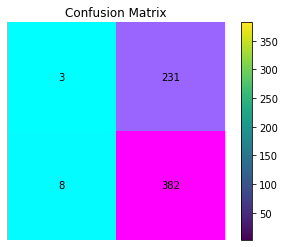

In [6]:
pred = model.predict(validation_generator)                                                        # Create a prediction matrix of the test generator
pred = np.round(pred)                                                                       # Round the prediction into either a 1 or 0
matrix = confusion_matrix(validation_generator.classes, pred)                                     # Create a confusion matrix based on the prediction
fig, ax = plt.subplots()                                                                    # Create a matplotlib figure
plt.title("Confusion Matrix")                                                               # Add a title to the plot
plt.colorbar(plt.imshow(matrix))                                                            # Add a color bar scale to the plot
ax.imshow(matrix, cmap = "cool")                                                            # Display the confusion matrix
ax.axis('off')                                                                              # Disable plot axis
for i in range(2):                                                                          # Iterates through the rows
    for j in range(2):                                                                      # Iterates through the columns
        text = ax.text(j, i, matrix[i, j], ha="center", va="center", color="black")         # Add an annotation to the plot for each element

In [7]:
TN = matrix[0][0]                                                                           # Take the True Negative value from the confusion matrix
TP = matrix[1][1]                                                                           # Take the True Positive value from the confusion matrix
FN = matrix[1][0]                                                                           # Take the False Negative value from the confusion matrix
FP = matrix[0][1]                                                                           # Take the True Positive value from the confusion matrix
print("True Negative: {}\t True Positive: {}".format(TN,TP))                                # Print the True Negative and True Positive values
print("False Negative: {}\t False Positive: {}\n".format(FN,FP))                            # Print the False Negative and False Positive values
print("False Positive Rate: {:.4f}".format(FP/(FP+TN)))                                     # Print the False Positive Rate
print("False Negative Rate: {:.4f}\n".format(FN/(FN+TP)))                                   # Print the False Negative Rate
print("Test Accuracy: {:.5f}".format((TP+TN)/(TP+TN+FN+FP)))                                # Print the test accuracy of the model

True Negative: 3	 True Positive: 382
False Negative: 8	 False Positive: 231

False Positive Rate: 0.9872
False Negative Rate: 0.0205

Test Accuracy: 0.61699


## Let's get interactive

Found 1 images belonging to 1 classes.
Probability of Pneumonia: 72.444% 
Probability of normal: 27.556%


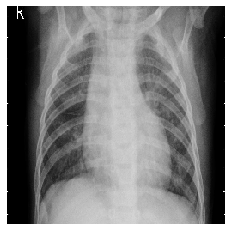

In [8]:
prediction_generator = test_datagen.flow_from_directory('data',                     # Connects the testing image data generator to the prediction images' directory.
                                                        target_size=(254,254),      # Sets the target size of the images to be 200x200.
                                                        batch_size=1,               # Sets the number of images to be generated per batch.
                                                        classes=['prediction'],     # Import only the images in prediction folder
                                                        class_mode='binary')        # Sets the classification mode to be binary since the predictions only consists of 2 classes.

plt.imshow(prediction_generator[0][0].squeeze())                                    # Plot the prediction image
plt.axis("off")                                                                     # Disable plot axis
pneumonia_prob = model.predict(prediction_generator).squeeze()                      # Predict the pneumonia probability
normal_prob = 1-pneumonia_prob                                                      # Calculate the normal probability

print("Probability of Pneumonia: {:.3f}% \nProbability of normal: {:.3f}%".format(pneumonia_prob*100,normal_prob*100)) # Print the predictions